<a href="https://colab.research.google.com/github/youngmoo/Colab/blob/main/MET_lab_colab_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Initial setup**

We'll use a shared Google Drive folder to load and save sound files (requires a Google account).

1.   Connect to [this Google Drive folder](https://drive.google.com/drive/folders/1dn2Y_PT6ce0hC7JoJiBGrhsXPLb0AFnc?usp=sharing).
2.   For the shared folder, select "Add shortcut to Drive" and add it to the top directory (under My Drive).

This will allow everyone to use the same directory path for loading and saving files.

Next, mount the Google Drive folder you just added. Run the next step, which will:

*   Ask  you for permission to access your Google Drive.
*   Once you give permission, Drive will provide an authorization code to enter (copy and paste it into the field in the next cell).




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Run the next cell to import the Python libraries we'll be using (NumPy, iPython, MatplotLib, Signal from SciPy, and LibROSA).

In [2]:
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal
import librosa
sharedFolder = 'ColabShare'

Run the next cell to set up initial parameters:

*   Sampling rate: $f_s = 44100$ Hz
*   Fundamental frequency of sinusoid: $f_0 = 440$ Hz (the musical note 'A3')
*   Duration of sound: 3.0 seconds

Create vector $t$, which is the time of each sample of our sound signal.


In [15]:
f_0 = 440       # Fundamental frequency
duration = 3.0  # Duration of sound
f_s = 44100     # Sampling frequency
t = np.linspace(0, duration, int(duration * f_s), endpoint = False) # Vector of time samples

In the next cell, set parameter $n$ to be your assigned number

In [4]:
n = 1   # Your assigned number
n

1

Click the next cell to generate your unique waveform. This will also plot the very beginning of the wave.

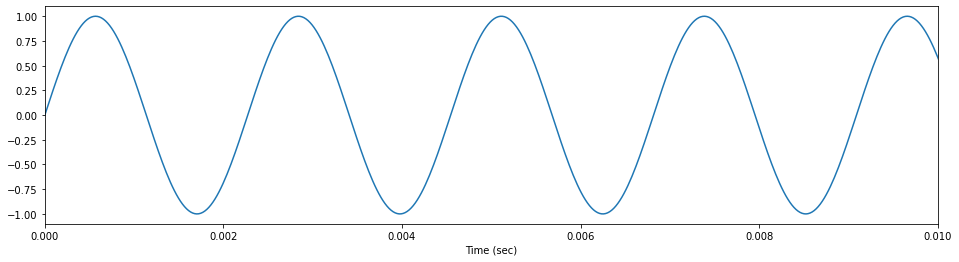

In [16]:
f = f_0 * n
x = np.sin(2 * np.pi * f * t)
# Plot the first 10 milliseconds of your signal
plt.figure(figsize = (16, 4))
plt.xlim(0,0.01)
plt.xlabel("Time (sec)")
plt.plot(t, x)

Next you, can verify you have a sinusoidal sound wave by running the next cell to listen to the audio.

In [17]:
ipd.Audio(x, rate=f_s)

Save your sound as a .wav file to the shared Google Drive folder.

In [9]:
path = '/content/drive/My Drive/' + sharedFolder + '/' + str(f) + '.wav'
librosa.output.write_wav(path, x, f_s)
path

'/content/drive/My Drive/ColabShare/220.wav'

*Pause here while everyone else is generating and saving their files.*

When ready, run the next cell to load all the .wav files and add them together.

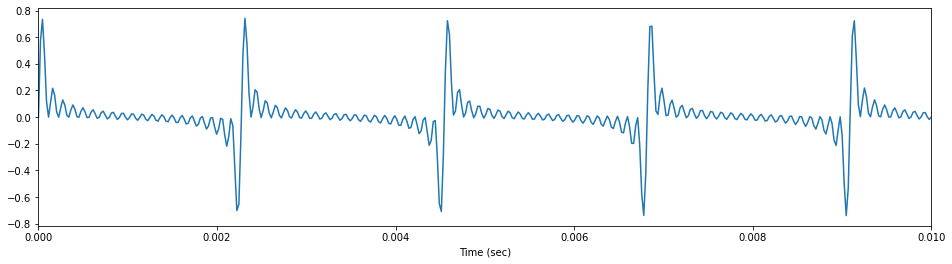

In [18]:
y = np.zeros(int(duration * f_s))
n_max = 20
for n in range(1, n_max+1):
  f = f_0 * n
  path = '/content/drive/My Drive/' + sharedFolder + '/' + str(f) + '.wav'
  this_y, this_f_s = librosa.load(path,sr=None)
  y = y + this_y

# Normalize by number of harmonics so that the signal values remain between [-1, 1]
y = y/n_max  

# Plot the initial 10 milliseconds of the combined signal
plt.figure(figsize = (16,4))
plt.xlim(0,0.01)
plt.xlabel("Time (sec)")
plt.plot(t, y)

Run the next cell to listen to the combined audio signal.

In [19]:
ipd.Audio(y, rate=f_s)

Let's see a spectrogram of the signal (frequency vs. time) using the Short-Time Fourier Transform (STFT).

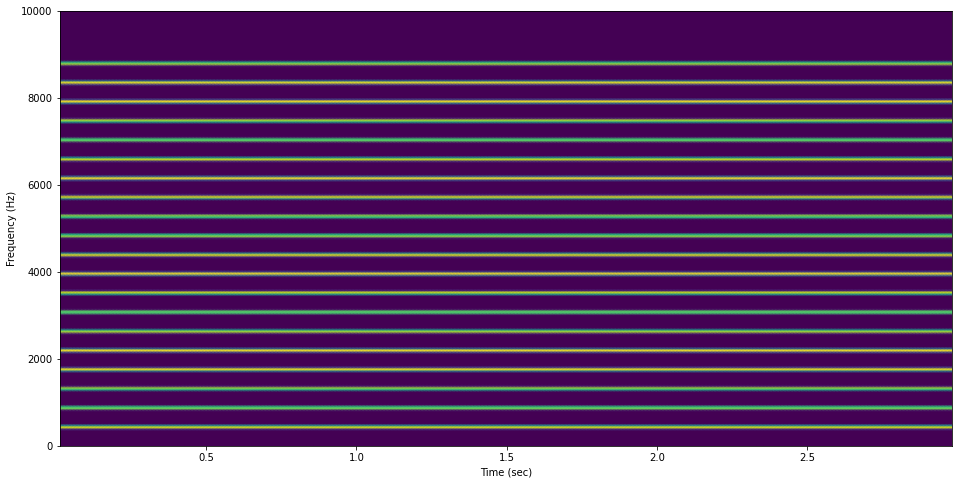

In [20]:
f1, t1, Sxx = signal.spectrogram(y, f_s, window='hann', nperseg=1024, noverlap=512, nfft=1024)
plt.figure(figsize = (16, 8))
plt.pcolormesh(t1, f1, Sxx, shading='gouraud')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.ylim(0, 10000)
plt.show()